<a href="https://colab.research.google.com/github/Shahrukh-DS/Shahrukh-DS2/blob/main/lung_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold, GridSearchCV, train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier

# Load and preprocess data
df = pd.read_csv("lung_cancer.csv")


In [2]:
df

,ID,TIME,Y,age,sex,ecog,karnoPH,karnoPAT
0,1,0,0,74,M,1,90,100
1,1,306,1,74,M,1,90,100
2,2,0,0,68,M,0,90,90
3,2,455,1,68,M,0,90,90
4,3,0,0,56,M,0,90,90
...,...,...,...,...,...,...,...,...
451,226,105,0,75,F,2,60,70
452,227,0,0,66,M,1,90,100
453,227,174,0,66,M,1,90,100
454,228,0,0,58,F,1,80,90


In [3]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456 entries, 0 to 455
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        456 non-null    int64 
 1   TIME      456 non-null    int64 
 2   Y         456 non-null    int64 
 3   age       456 non-null    int64 
 4   sex       456 non-null    object
 5   ecog      456 non-null    int64 
 6   karnoPH   456 non-null    int64 
 7   karnoPAT  456 non-null    int64 
dtypes: int64(7), object(1)
memory usage: 28.6+ KB
None


In [4]:
print(df.describe())


               ID         TIME           Y         age        ecog  \
count  456.000000   456.000000  456.000000  456.000000  456.000000   
mean   114.500000   152.616228    0.361842   62.447368    0.951754   
std     65.889585   213.260208    0.481061    9.063480    0.715509   
min      1.000000     0.000000    0.000000   39.000000    0.000000   
25%     57.750000     0.000000    0.000000   56.000000    0.000000   
50%    114.500000     2.500000    0.000000   63.000000    1.000000   
75%    171.250000   253.750000    1.000000   69.000000    1.000000   
max    228.000000  1022.000000    1.000000   82.000000    3.000000   

          karnoPH    karnoPAT  
count  456.000000  456.000000  
mean    81.929825   79.956140  
std     12.287915   14.510256  
min     50.000000   30.000000  
25%     77.500000   70.000000  
50%     80.000000   80.000000  
75%     90.000000   90.000000  
max    100.000000  100.000000  


In [5]:
print(df.head())

   ID  TIME  Y  age sex  ecog  karnoPH  karnoPAT
0   1     0  0   74   M     1       90       100
1   1   306  1   74   M     1       90       100
2   2     0  0   68   M     0       90        90
3   2   455  1   68   M     0       90        90
4   3     0  0   56   M     0       90        90


In [6]:
print(df.isnull().sum())


ID          0
TIME        0
Y           0
age         0
sex         0
ecog        0
karnoPH     0
karnoPAT    0
dtype: int64


Univariate Analysis

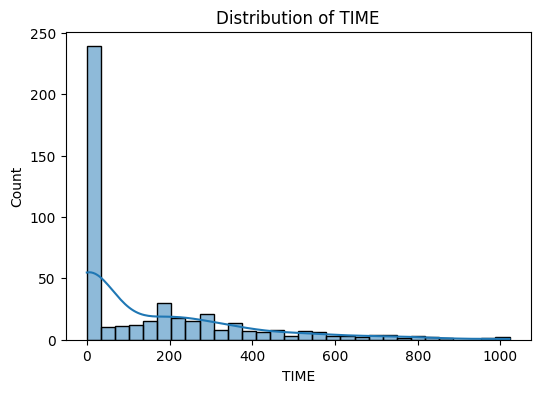

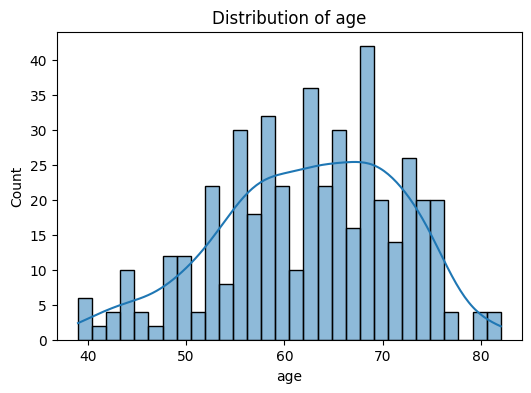

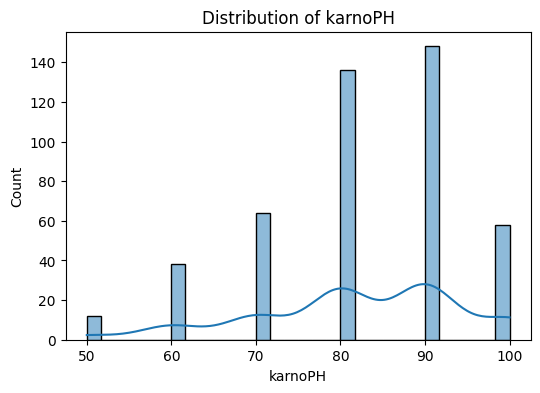

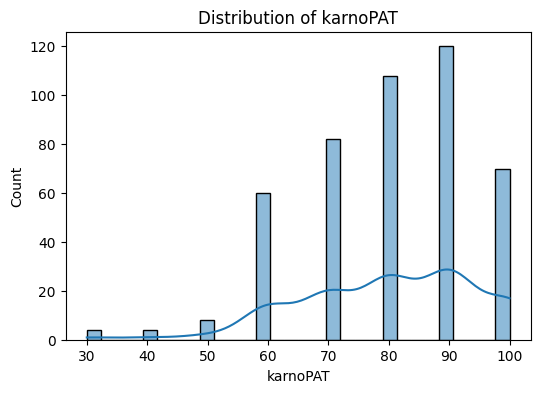

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = ['TIME', 'age', 'karnoPH', 'karnoPAT']

for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()


Categorical Features

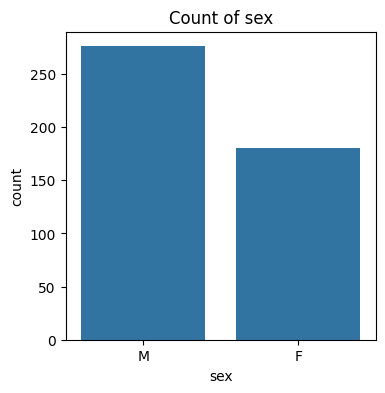

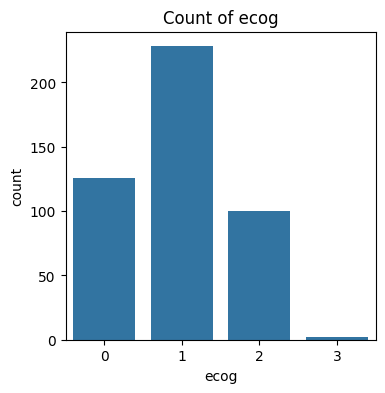

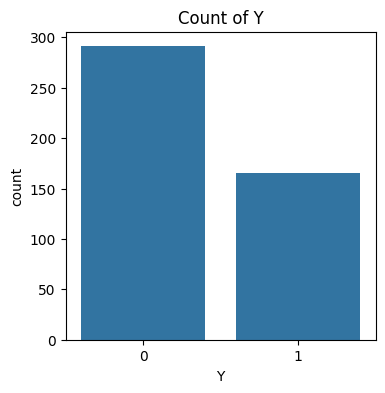

In [8]:
cat_cols = ['sex', 'ecog', 'Y']

for col in cat_cols:
    plt.figure(figsize=(4, 4))
    sns.countplot(data=df, x=col)
    plt.title(f'Count of {col}')
    plt.show()


Survival (TIME) by sex and ecog

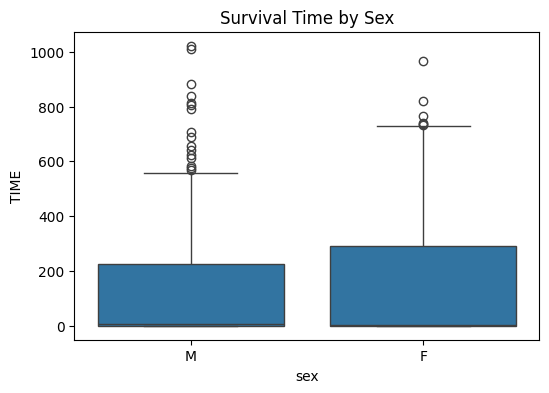

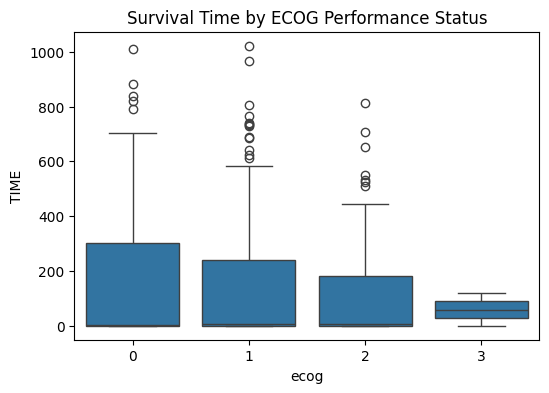

In [9]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='sex', y='TIME')
plt.title('Survival Time by Sex')
plt.show()

plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='ecog', y='TIME')
plt.title('Survival Time by ECOG Performance Status')
plt.show()


Correlation Heatmap for Numeric Features

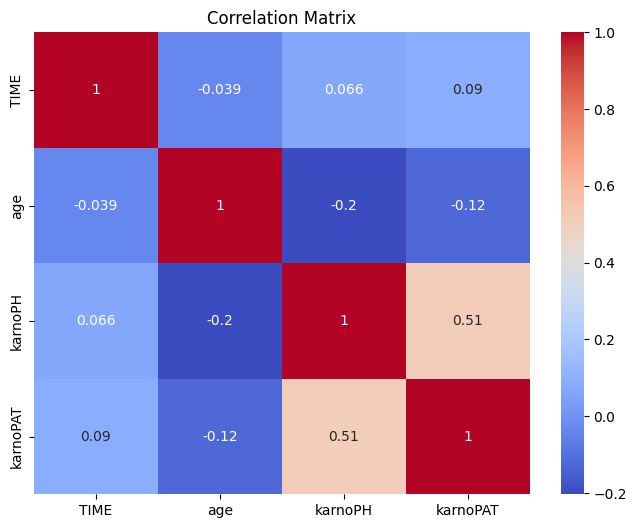

In [10]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


Compare features for Y=1 (event occurred) vs Y=0 (censored)

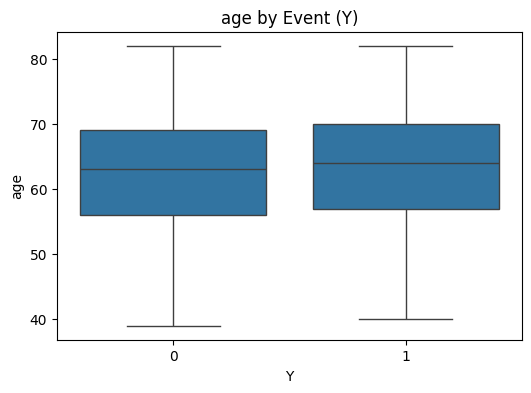

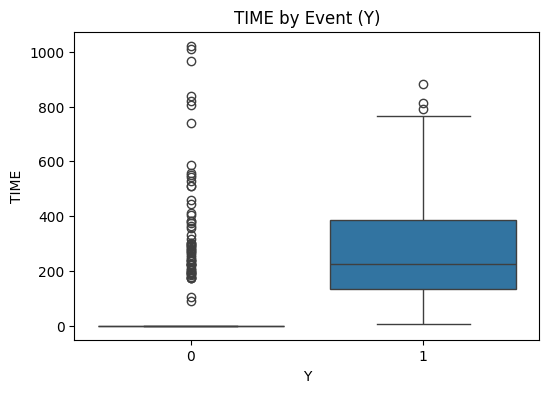

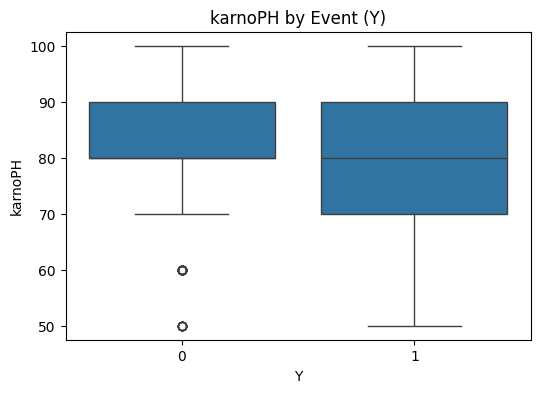

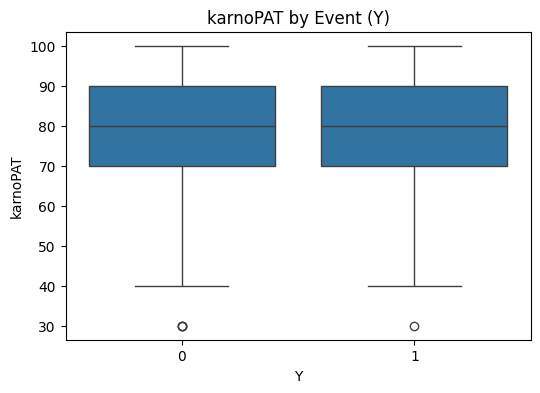

In [11]:
event_group = df[df['Y'] == 1]
censored_group = df[df['Y'] == 0]

# Boxplots
for col in ['age', 'TIME', 'karnoPH', 'karnoPAT']:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, x='Y', y=col)
    plt.title(f'{col} by Event (Y)')
    plt.show()
